# Segundo Parcial F√≠sica Computacional II

### Dayana Andrea Henao Arbel√°ez 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

## Simulaci√≥n de propagaci√≥n de onda sinusoidal con FDTD

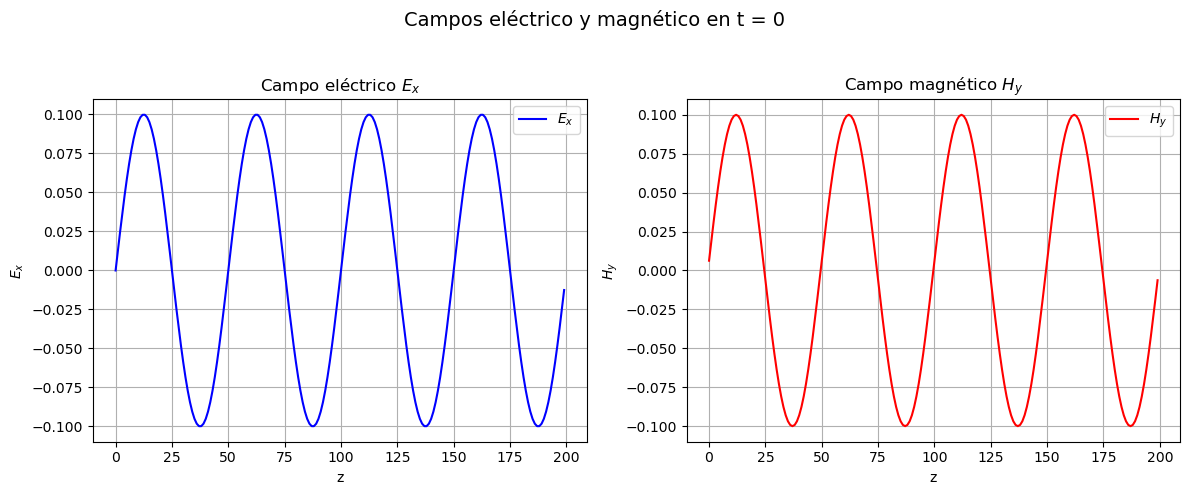

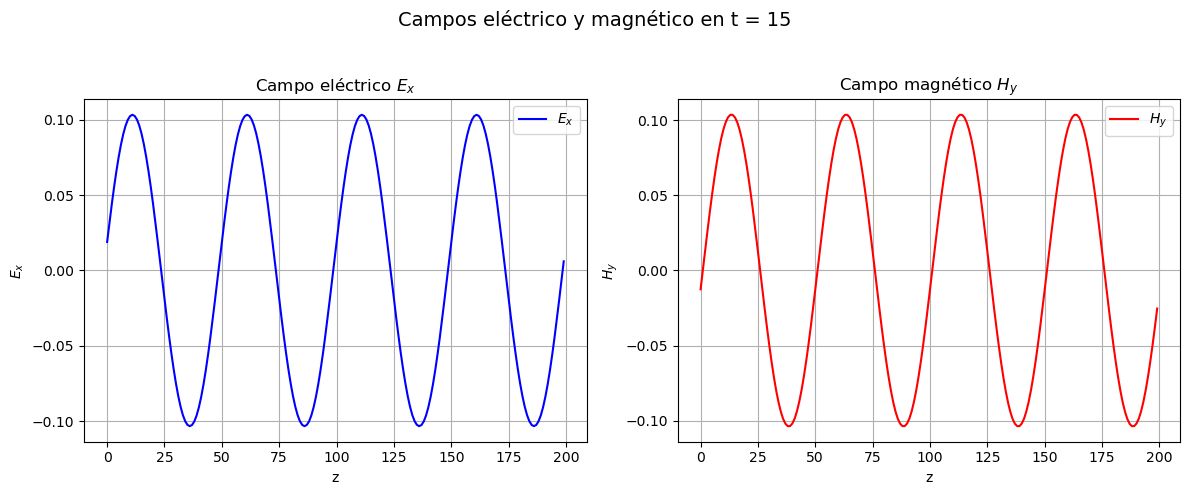

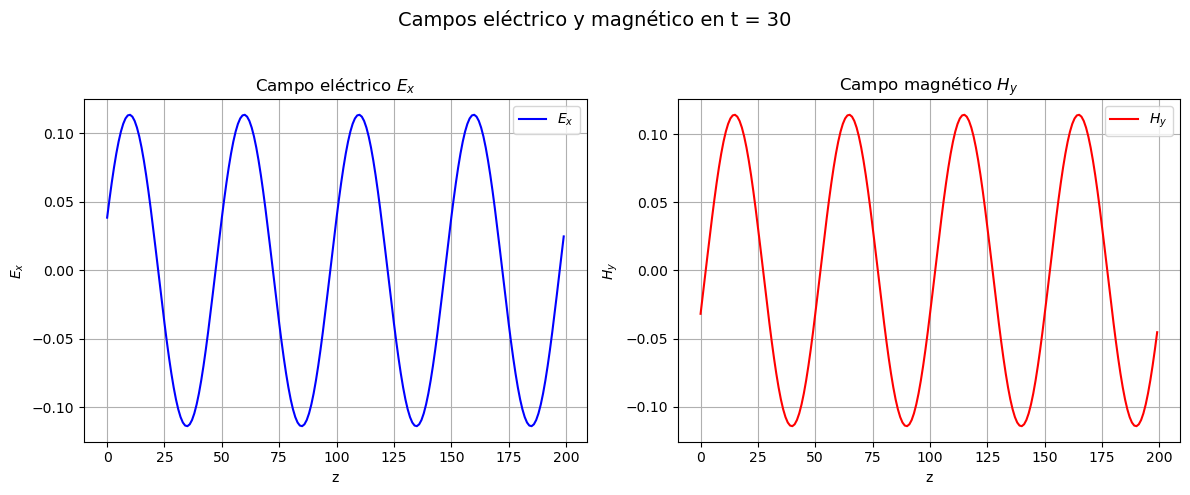

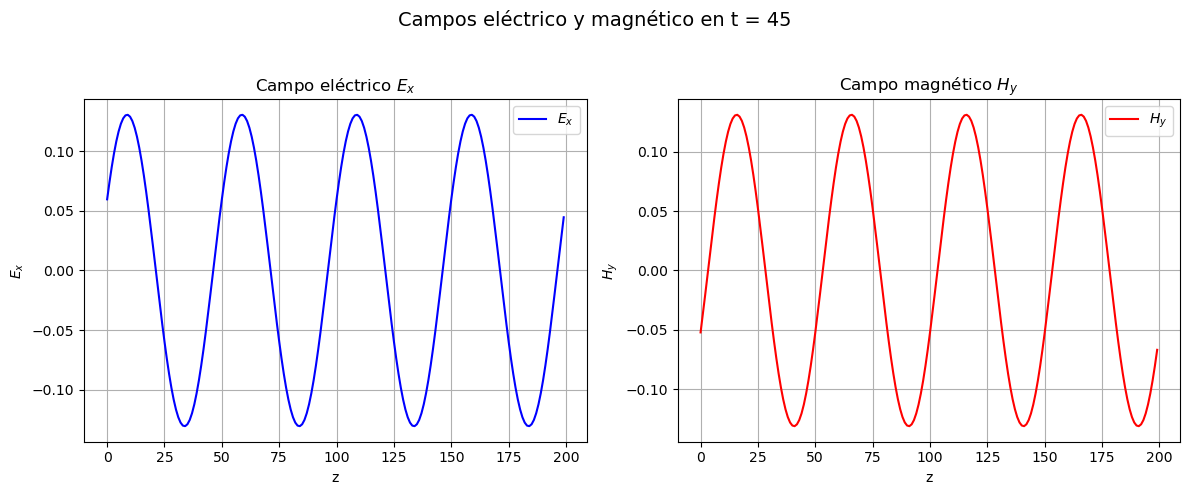

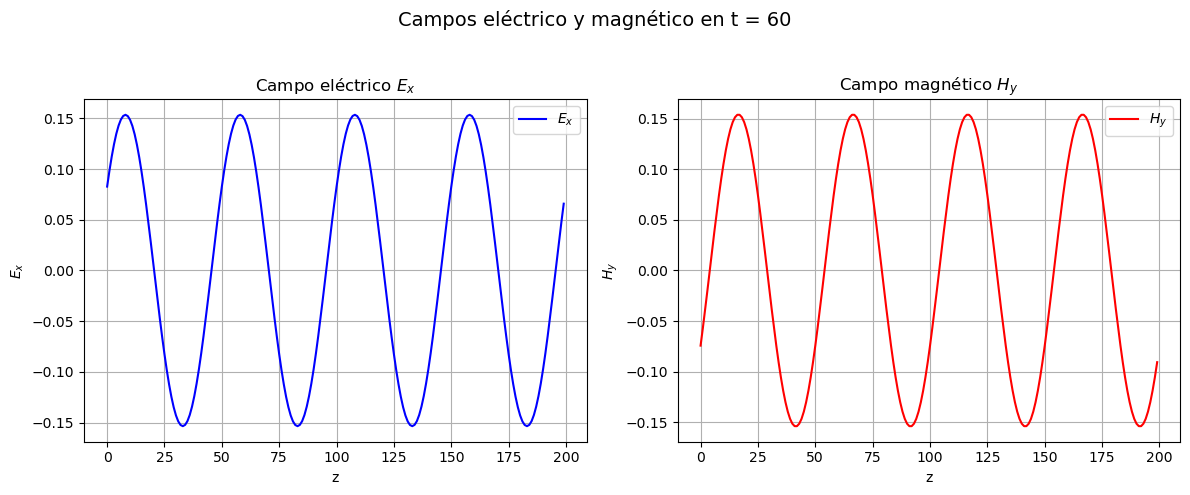

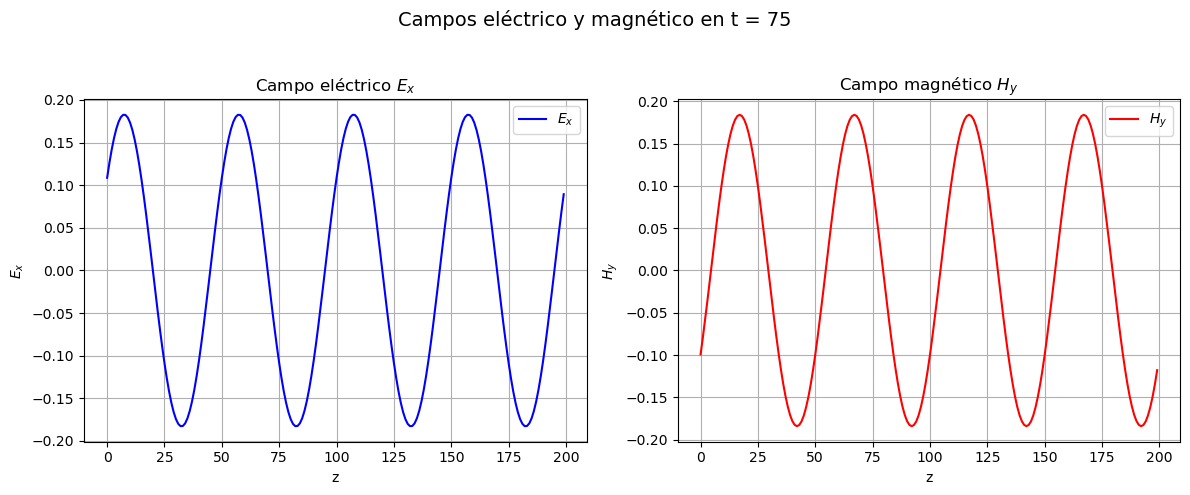

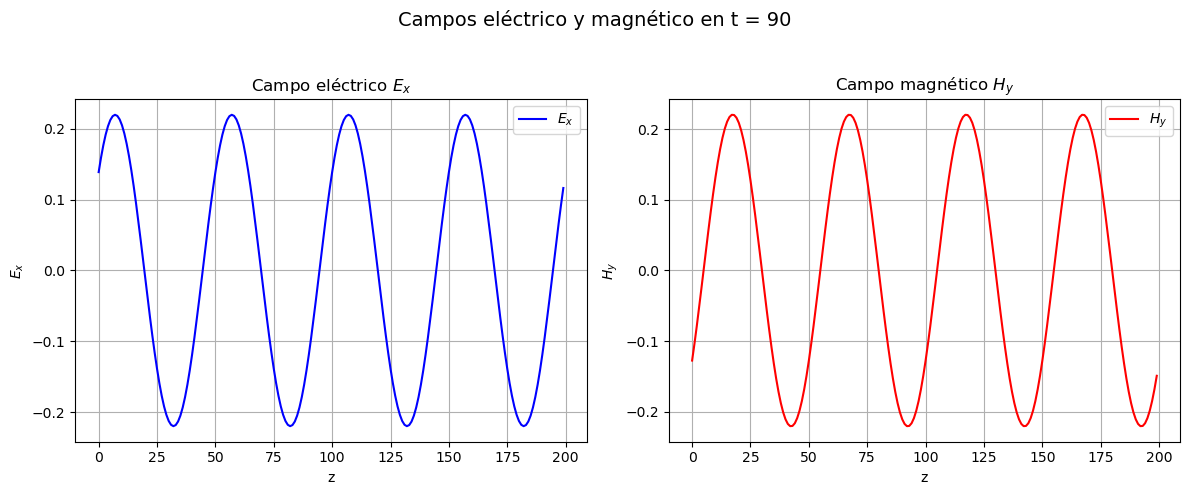

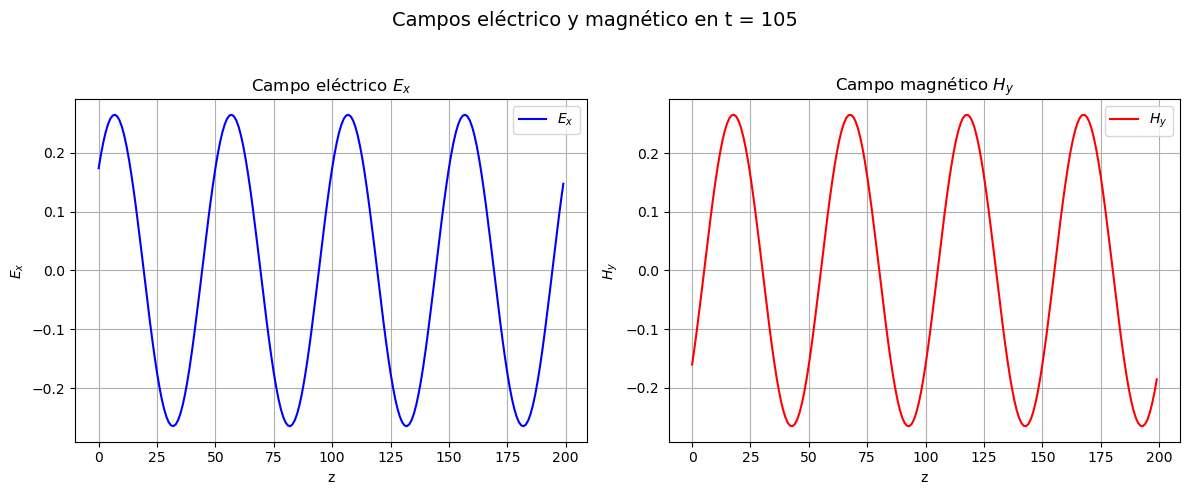

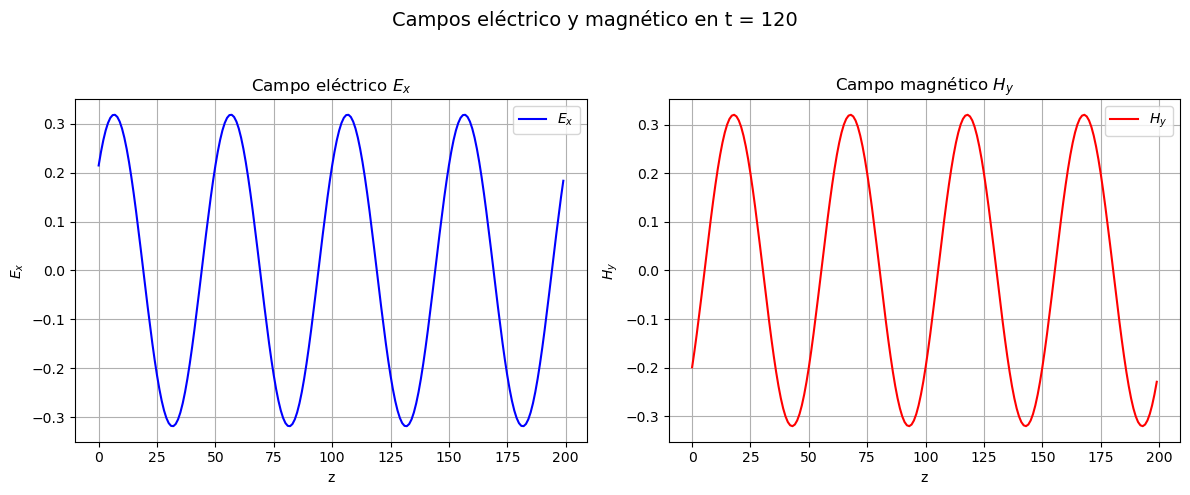

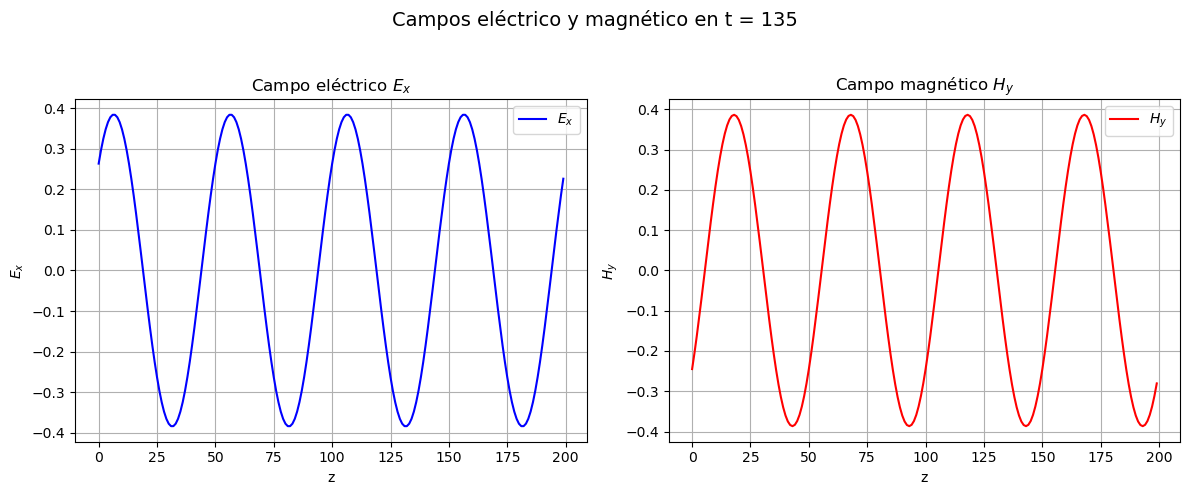

In [11]:
outdir = "/home/dayana-henao/Escritorio/004_EstudiantesFC2/EntregasEstudiantes/Henao_85/Parcial2/output/periodic"

# Obtener archivos y extraer n√∫meros de paso
snapshot_files = glob.glob(f"{outdir}/snapshot_step_*.csv")

# Crear lista de (n√∫mero_paso, archivo)
file_step_pairs = []
for f in snapshot_files:
    step_num = int(re.search(r'step_(\d+)', f).group(1))
    file_step_pairs.append((step_num, f))

# Ordenar por n√∫mero de paso
file_step_pairs.sort(key=lambda x: x[0])

for step, filename in file_step_pairs:
    df = pd.read_csv(filename)

    # Crear figura con dos subplots lado a lado
    fig, axes = plt.subplots(ncols=2, figsize=(12,5))

    # Gr√°fica del campo el√©ctrico Ex
    axes[0].plot(df["i"], df["Ex"], color="blue", label="$E_x$")
    axes[0].set_xlabel("z")
    axes[0].set_ylabel("$E_x$")
    axes[0].set_title(f"Campo el√©ctrico $E_x$")
    axes[0].grid(True)
    axes[0].legend()

    # Gr√°fica del campo magn√©tico Hy (H)
    axes[1].plot(df["i"], df["Hy"], color="red", label="$H_y$")
    axes[1].set_xlabel("z")
    axes[1].set_ylabel("$H_y$")
    axes[1].set_title(f"Campo magn√©tico $H_y$")
    axes[1].grid(True)
    axes[1].legend()

    # T√≠tulo general para el paso
    fig.suptitle(f"Campos el√©ctrico y magn√©tico en t = {step}", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()



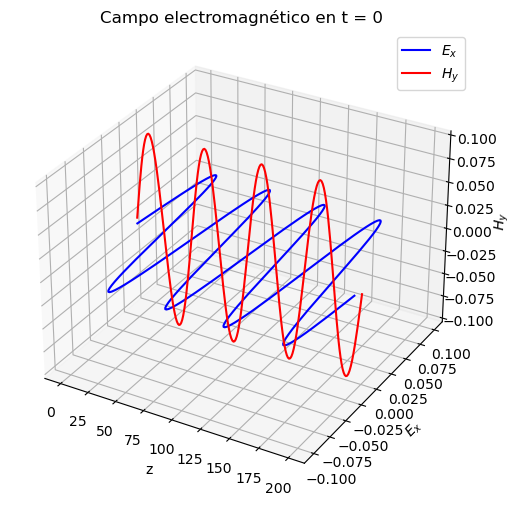

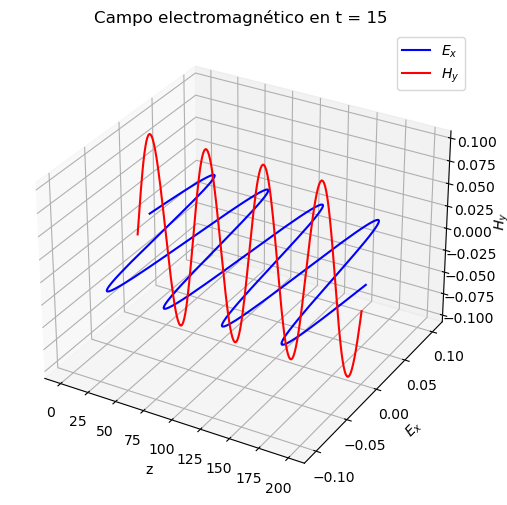

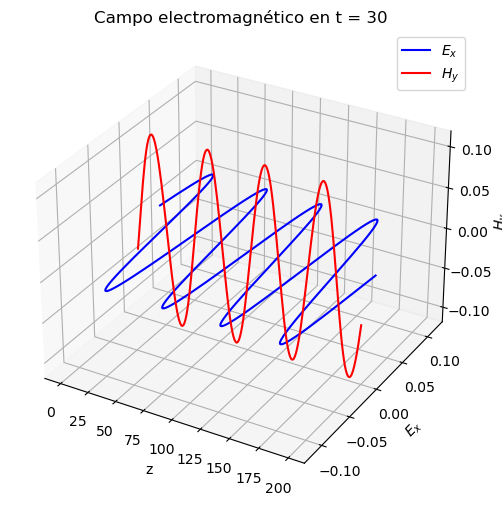

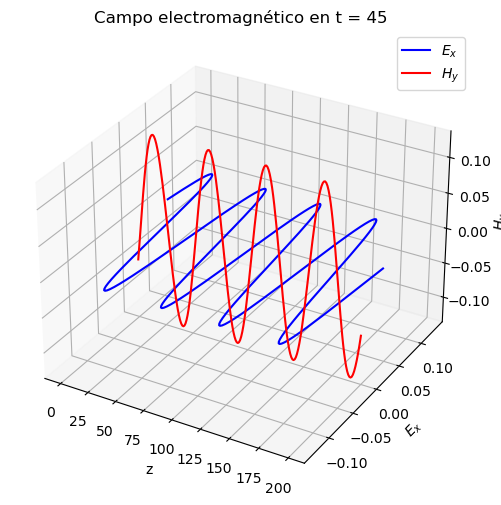

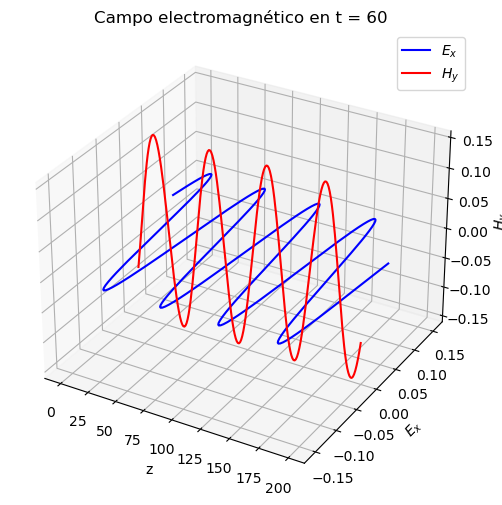

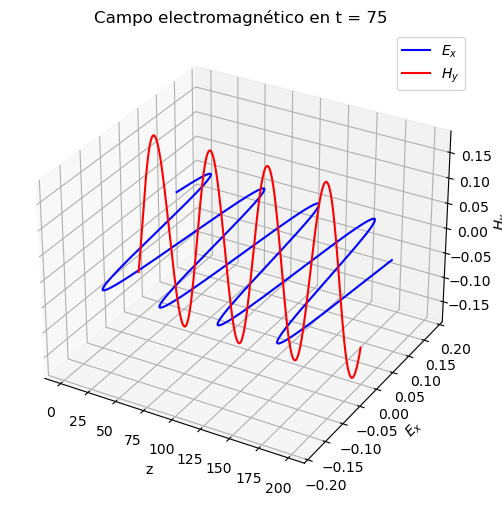

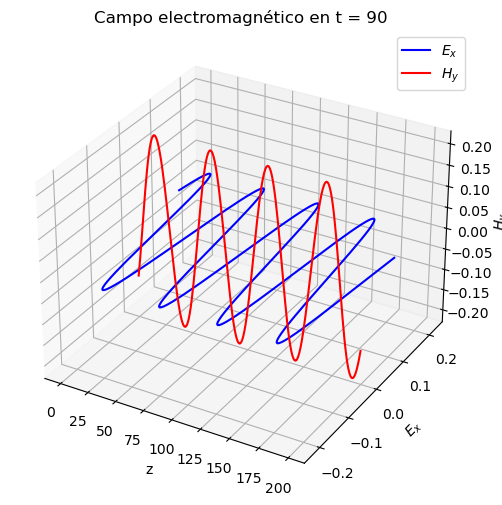

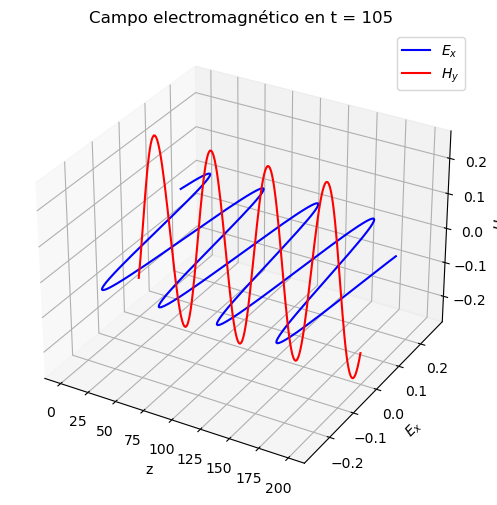

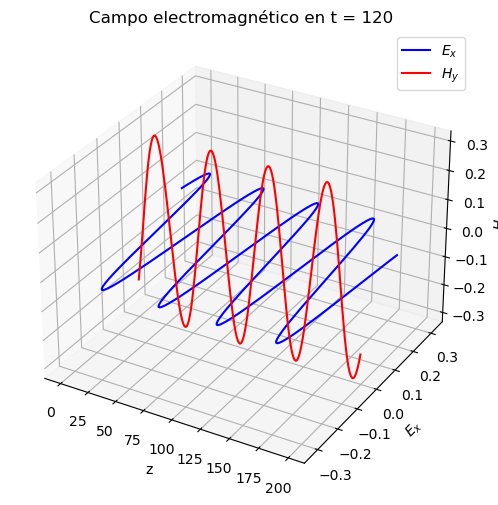

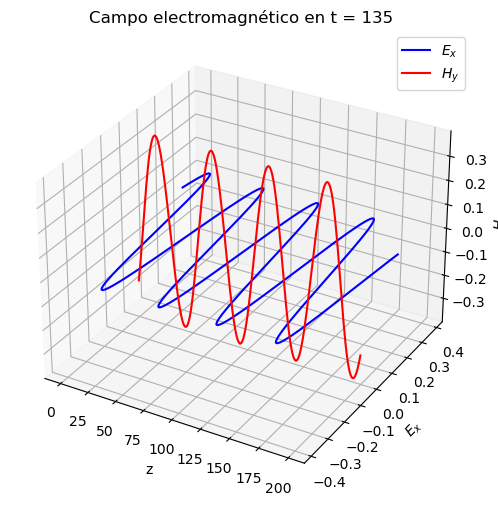

In [12]:
for step, filename in file_step_pairs:
    df = pd.read_csv(filename)
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')

    z = df["i"].to_numpy()
    Ex = df["Ex"].to_numpy()
    Hy = df["Hy"].to_numpy()


    # Campo electrico Ex(z)
    ax.plot(z, Ex, np.zeros_like(z), color="blue", label="$E_x$")

    # Campo magn√©tico Hy(z)
    ax.plot(z, np.zeros_like(z), Hy, color="red", label="$H_y$")

    ax.set_xlabel("z")
    ax.set_ylabel("$E_x$")
    ax.set_zlabel("$H_y$") 
    ax.set_title(f"Campo electromagn√©tico en t = {step}")

    ax.legend()
    plt.show()



El comportamiento esperado bajo condiciones de frontera peri√≥dicas es que la onda sinusoidal inicial se propague indefinidamente a lo largo de la malla sin atenuaci√≥n ni deformaci√≥n; al alcanzar el extremo derecho del dominio debe volver a entrar por el extremo izquierdo conservando su amplitud y la fase relativa entre los campos el√©ctrico y magn√©tico. En la simulaci√≥n con Œ≤=0.1 este comportamiento se reproduce bien, las gr√°ficas muestran ondas que se desplazan con la misma forma y la separaci√≥n de medio paso espacial. Sin embargo, al aumentar ùõΩ hacia el l√≠mite de estabilidad (Œ≤‚Üí0.5) la simulaci√≥n se vuelve num√©ricamente inestable y se produce un crecimiento exponencial en las amplitudes de los campos. 

## Estudio de condiciones de frontera y estabilidad num√©rica

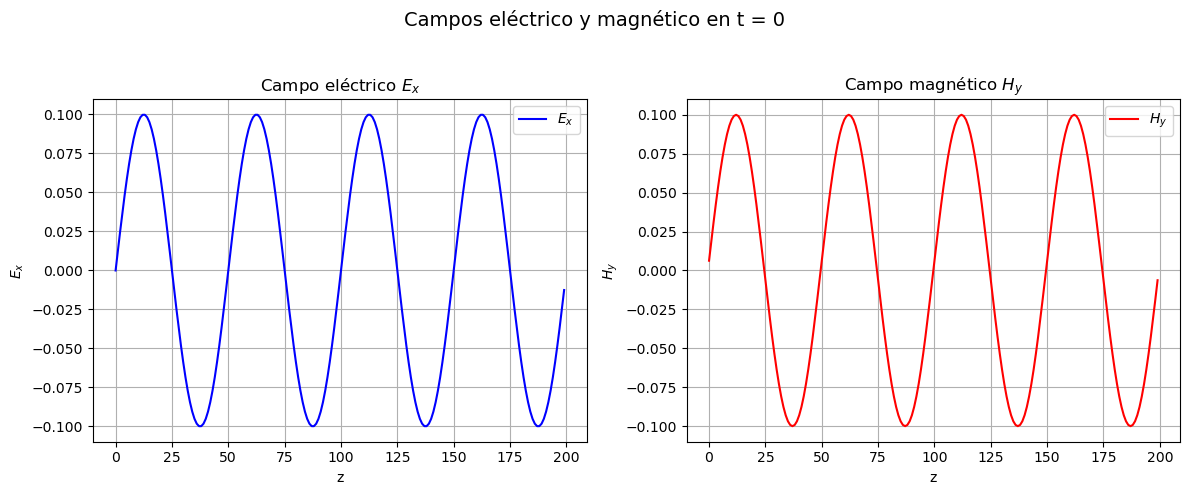

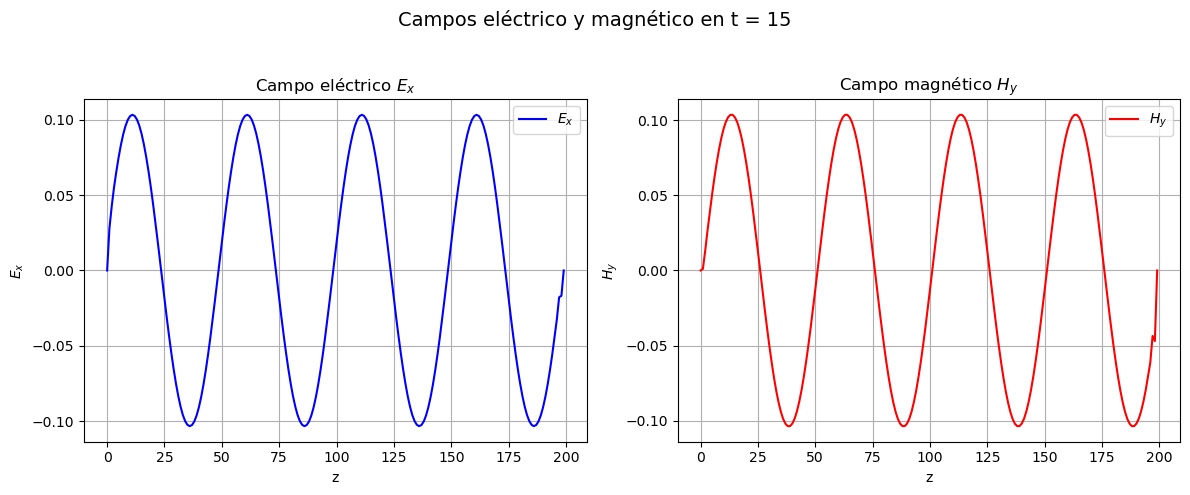

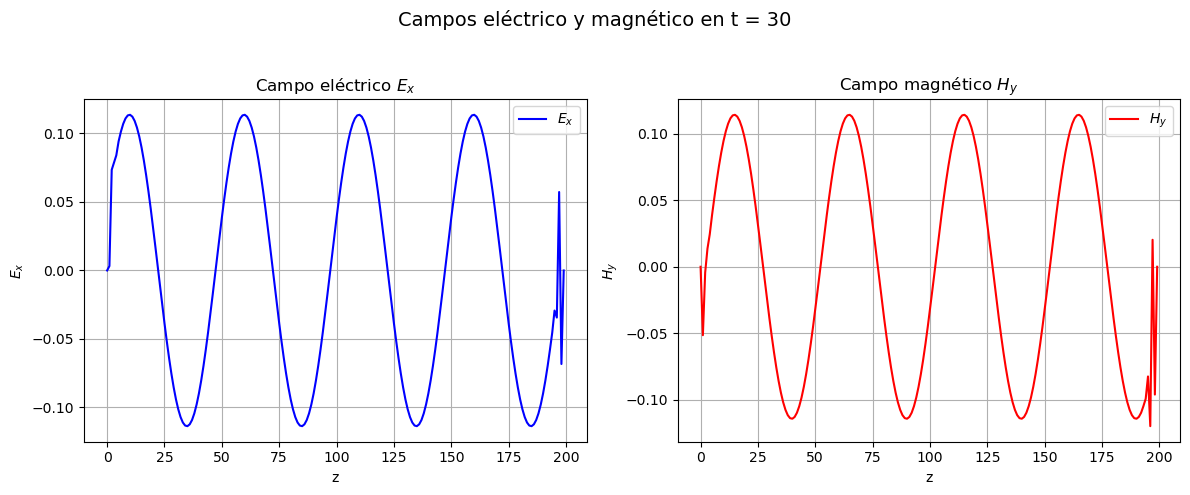

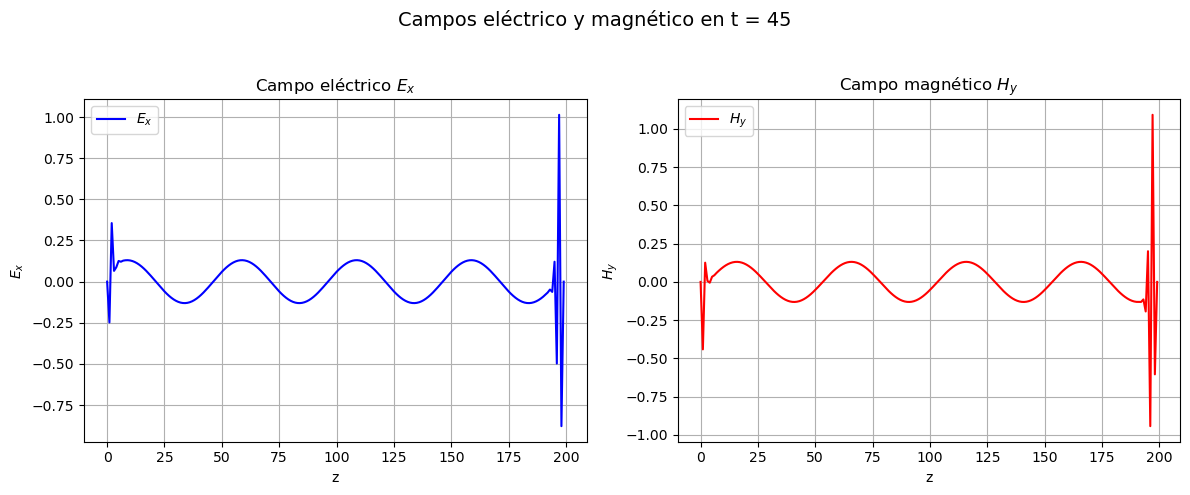

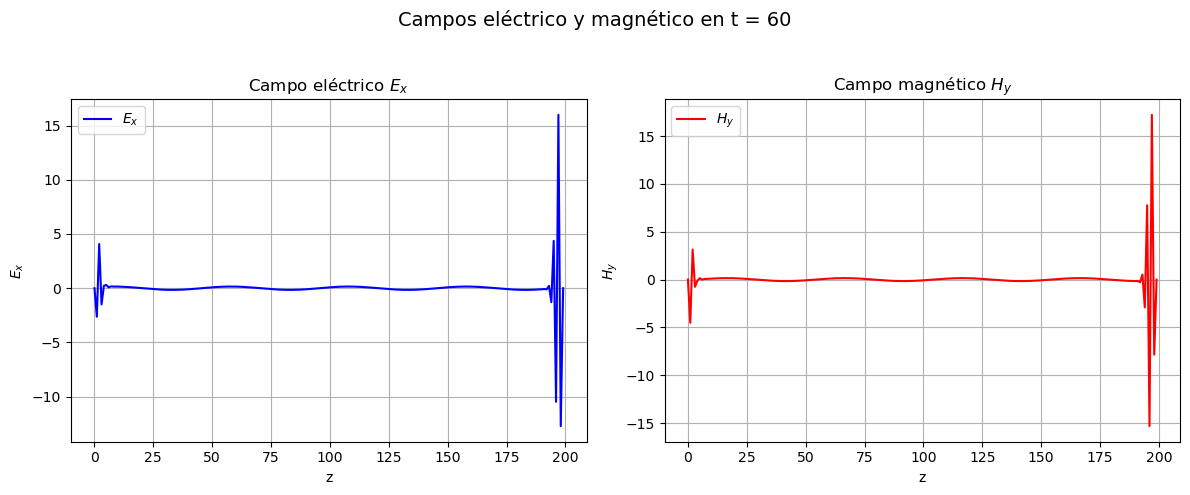

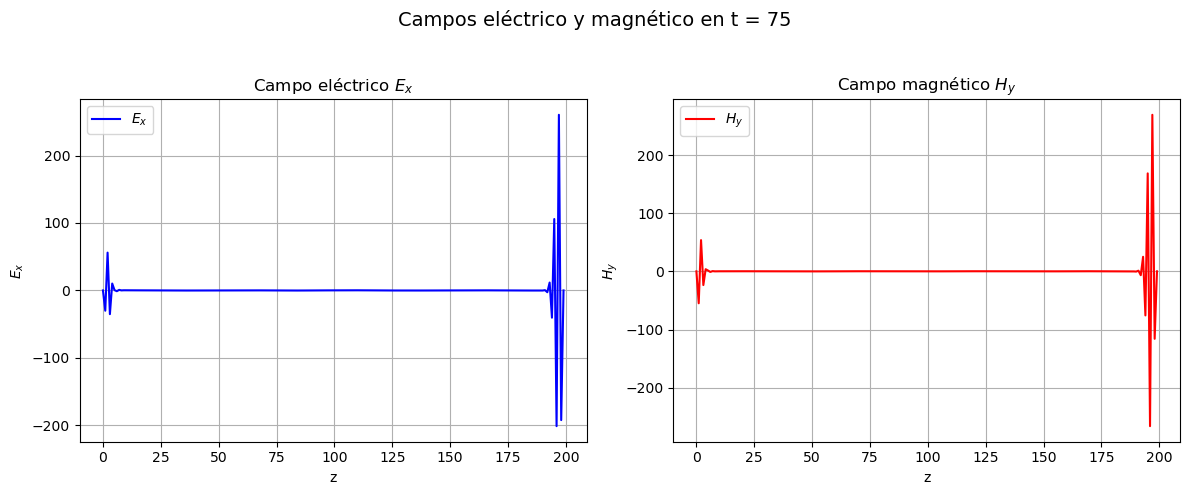

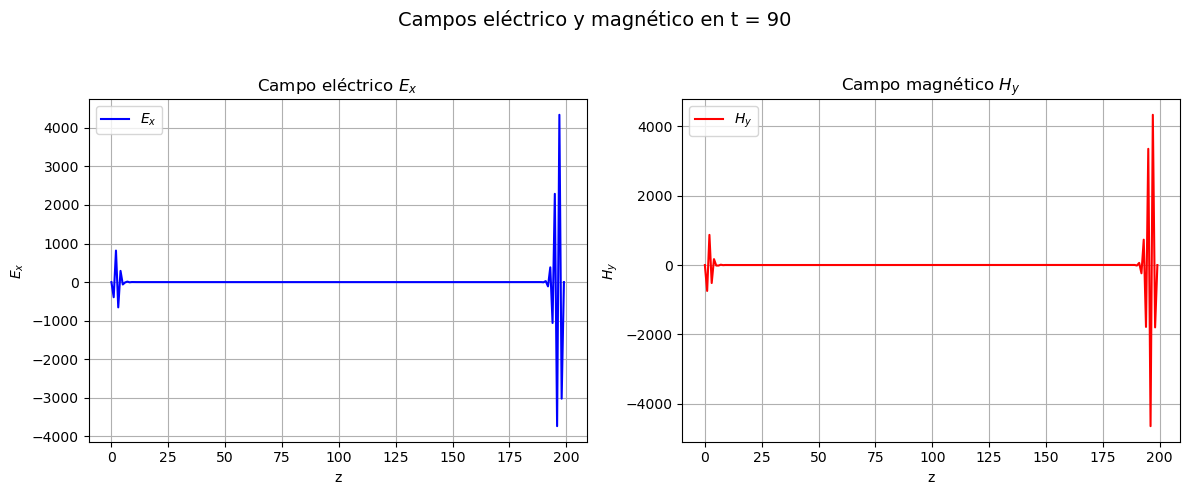

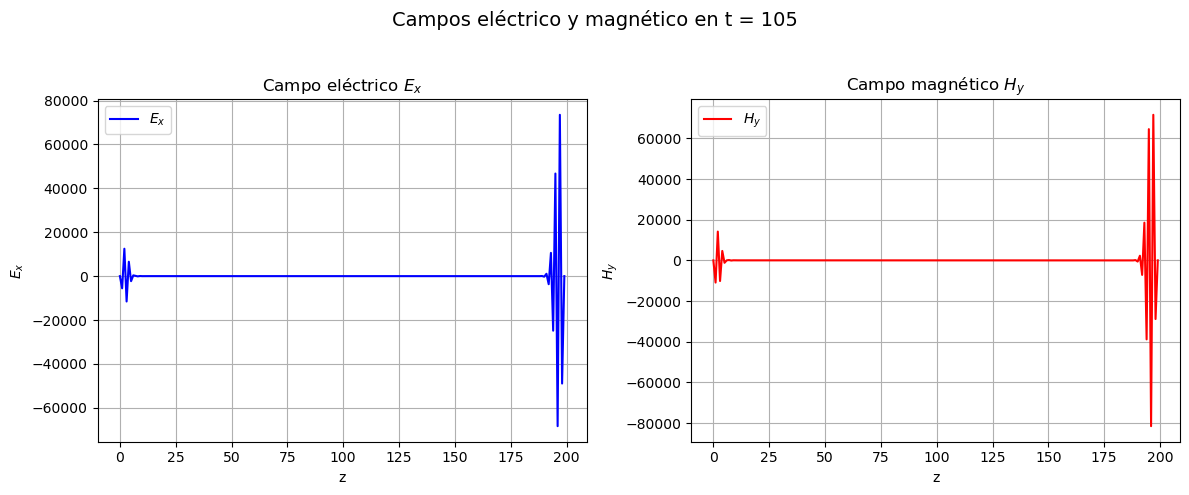

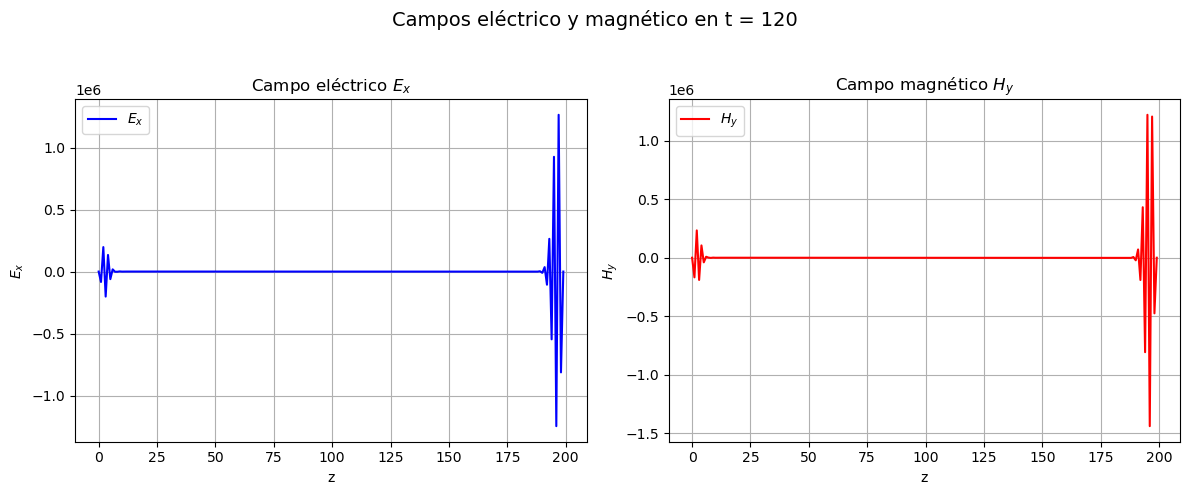

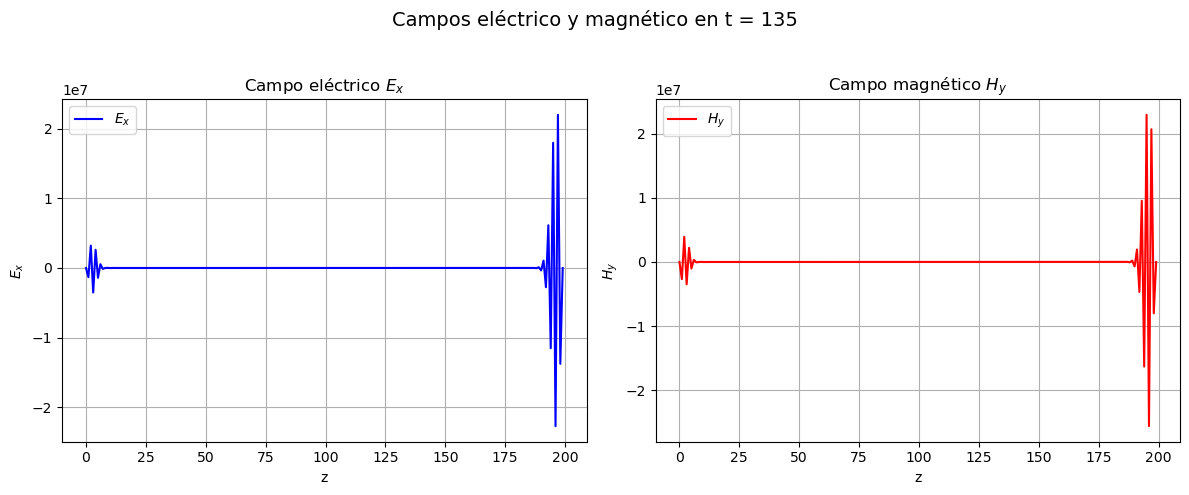

In [13]:
outdir = "/home/dayana-henao/Escritorio/004_EstudiantesFC2/EntregasEstudiantes/Henao_85/Parcial2/output/dirichlet"

# Obtener archivos y extraer n√∫meros de paso
snapshot_files = glob.glob(f"{outdir}/snapshot_step_*.csv")

# Crear lista de (n√∫mero_paso, archivo)
file_step_pairs = []
for f in snapshot_files:
    step_num = int(re.search(r'step_(\d+)', f).group(1))
    file_step_pairs.append((step_num, f))

# Ordenar por n√∫mero de paso
file_step_pairs.sort(key=lambda x: x[0])

for step, filename in file_step_pairs:
    df = pd.read_csv(filename)

    # Crear figura con dos subplots lado a lado
    fig, axes = plt.subplots(ncols=2, figsize=(12,5))

    # Gr√°fica del campo el√©ctrico Ex
    axes[0].plot(df["i"], df["Ex"], color="blue", label="$E_x$")
    axes[0].set_xlabel("z")
    axes[0].set_ylabel("$E_x$")
    axes[0].set_title(f"Campo el√©ctrico $E_x$")
    axes[0].grid(True)
    axes[0].legend()

    # Gr√°fica del campo magn√©tico Hy (H)
    axes[1].plot(df["i"], df["Hy"], color="red", label="$H_y$")
    axes[1].set_xlabel("z")
    axes[1].set_ylabel("$H_y$")
    axes[1].set_title(f"Campo magn√©tico $H_y$")
    axes[1].grid(True)
    axes[1].legend()

    # T√≠tulo general para el paso
    fig.suptitle(f"Campos el√©ctrico y magn√©tico en t = {step}", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()




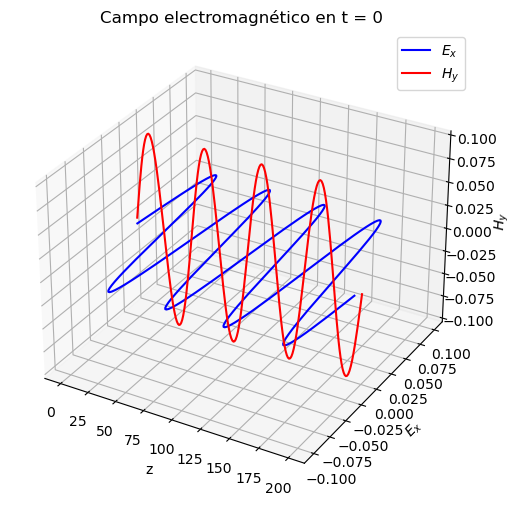

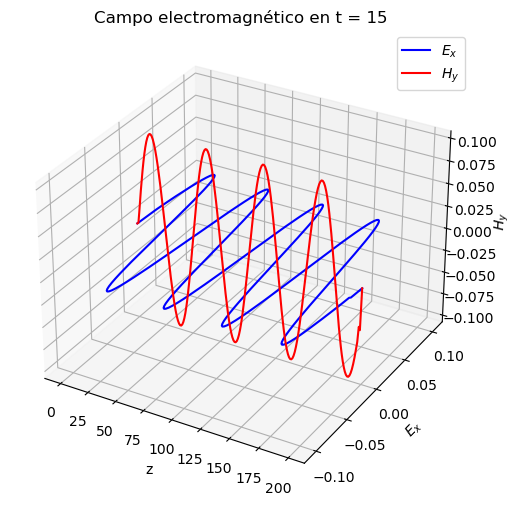

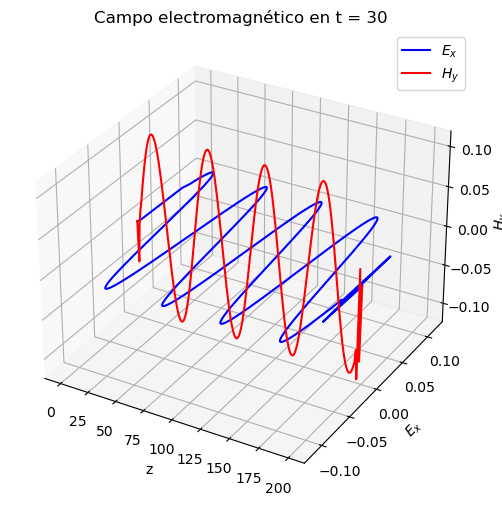

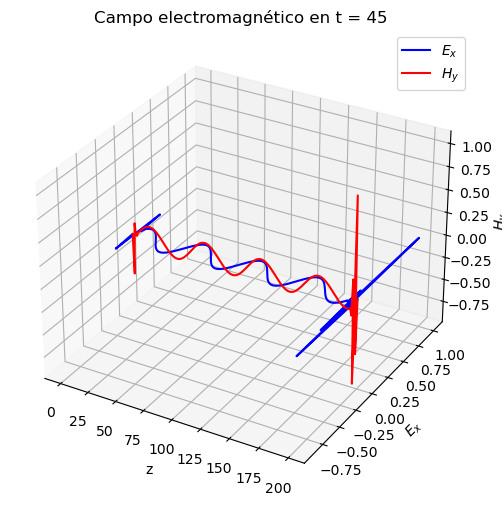

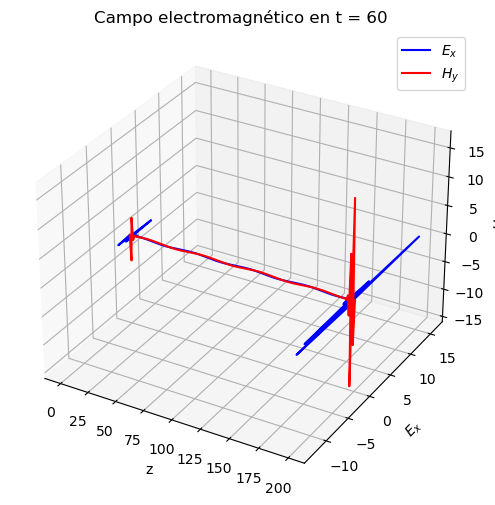

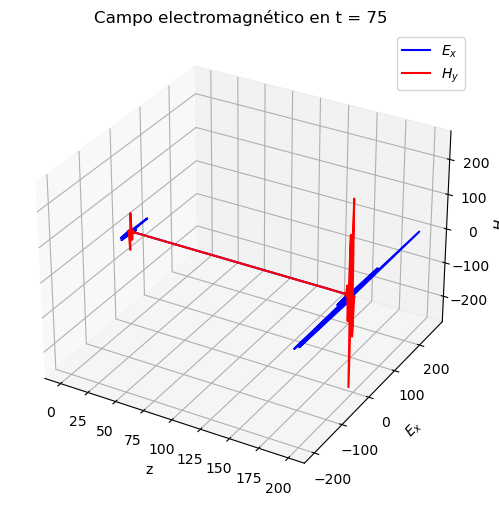

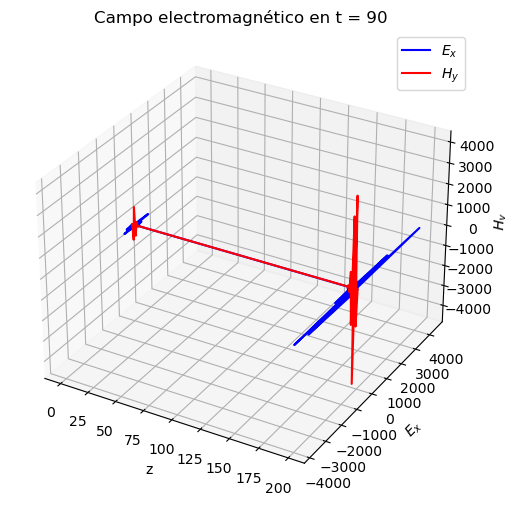

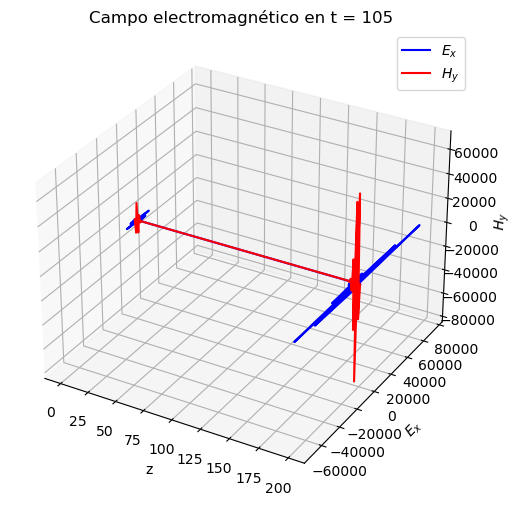

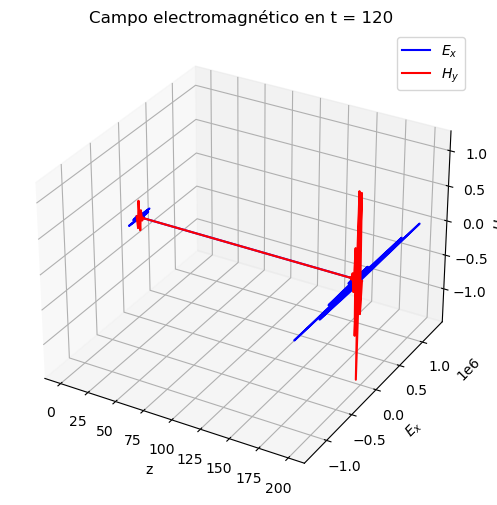

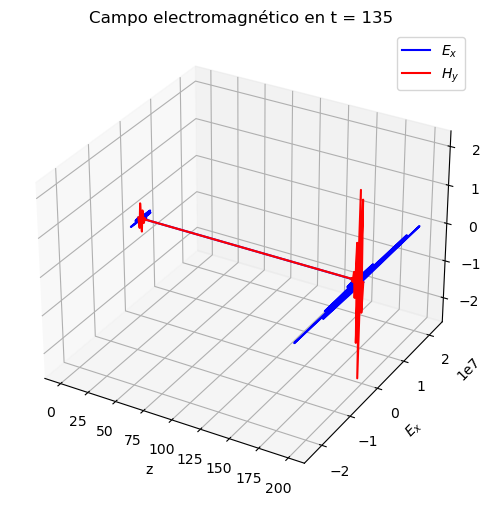

In [14]:
for step, filename in file_step_pairs:
    df = pd.read_csv(filename)
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')

    z = df["i"].to_numpy()
    Ex = df["Ex"].to_numpy()
    Hy = df["Hy"].to_numpy()


    # Campo electrico Ex(z)
    ax.plot(z, Ex, np.zeros_like(z), color="blue", label="$E_x$")

    # Campo magn√©tico Hy(z)
    ax.plot(z, np.zeros_like(z), Hy, color="red", label="$H_y$")

    ax.set_xlabel("z")
    ax.set_ylabel("$E_x$")
    ax.set_zlabel("$H_y$") 
    ax.set_title(f"Campo electromagn√©tico en t = {step}")

    ax.legend()
    plt.show()




En el caso en el que se tienen condiciones de Dirichlet (E=H=0 en los bordes), la onda al llegar a los extremos debe reflejarse. A partir de los gr√°ficos realizados se pueden observar patrones de interferencia para los primeros pasos temporales, con zonas de m√°ximos (interferencia constructiva) y m√≠nimos (interferencia destructiva). No obstante, a medida que avanza la evoluci√≥n temporal, las amplitudes comienzan a crecer de manera exponencial, lo que evidencia la presencia de una inestabilidad num√©rica. Dado que se est√° empleando un valor de Œ≤=0.1 dentro de la condici√≥n de Courant, es muy probable que la causa del fallo no sea la estabilidad en s√≠, sino una inconsistencia en la implementaci√≥n del c√≥digo.
